In [ ]:
# Bryan Ochoa July 25 2023 bochoa@lbl.gov

# epics integration of piezo characterization
# using epics and bluesky and ophyd to poll position of the 
# interferometer at different frequencies

In [2]:
from bluesky import RunEngine
import epics
from ophyd import EpicsSignal
from bluesky.plans import count
pico= 'CATERETE:PICOSCALE:'

In [3]:
epics.cainfo(pico+"STREAM_STATUS")

== CATERETE:PICOSCALE:STREAM_STATUS  (time_enum) ==
   value      = 1
   char_value = 'Stream active'
   count      = 1
   nelm       = 1
   type       = time_enum
   host       = 192.168.10.165:5064
   access     = read/write
   status     = 0
   char_status= NO_ALARM
   severity   = 0
   char_severity       = NO_ALARM
   timestamp  = 1690323759.699 (2023-07-25 15:22:39.69850)
   posixseconds        = 1690323759.0
   nanoseconds= 698504151
   enum strings: 
       0 = Stream inactive 
       1 = Stream active 
   PV is internally monitored, with 0 user-defined callbacks:


In [4]:
RE = RunEngine({})
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

0

In [5]:
from databroker import Broker
db = Broker.named('temp')

# Insert all metadata/data captured into db.
RE.subscribe(db.insert)

1

In [6]:
from bluesky.utils import ProgressBarManager
RE.waiting_hook = ProgressBarManager()

In [7]:
epics.caput(pico + "FRAMERATE", 152.58)
device = EpicsSignal("CATERETE:PICOSCALE:POS_2")
dets = [device]



Transient Scan ID: 2     Time: 2023-07-25 15:29:46
Persistent Unique Scan ID: 'e22e8b79-0082-44af-af35-f99acb2239d7'
New stream: 'primary'
+-----------+------------+--------------------------+
|   seq_num |       time | CATERETE:PICOSCALE:POS_2 |
+-----------+------------+--------------------------+
|         1 | 15:29:46.2 |                 -1098533 |
|         2 | 15:29:46.3 |                 -1117653 |
|         3 | 15:29:46.3 |                 -1159948 |
|         4 | 15:29:46.4 |                 -1118883 |
|         5 | 15:29:46.4 |                 -1109185 |
|         6 | 15:29:46.4 |                 -1177492 |
|         7 | 15:29:46.4 |                 -1158239 |
|         8 | 15:29:46.5 |                 -1081940 |
|         9 | 15:29:46.5 |                 -1105909 |
|        10 | 15:29:46.5 |                 -1179368 |
|        11 | 15:29:46.5 |                 -1162441 |
|        12 | 15:29:46.6 |                 -1093535 |
|        13 | 15:29:46.6 |                 -11228

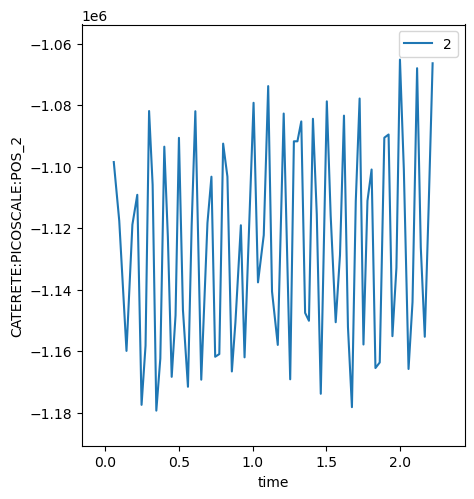

In [16]:
epics.caput('CATERETE:PICOSCALE:STREAM_START', 2)
uid, = RE(count(dets, num = 75))
epics.camonitor_clear('CATERETE:PICOSCALE:POS_2') 

In [79]:
headers = db[-1]
data = headers.table()

In [80]:
x = data['time'] 
y = data['CATERETE:PICOSCALE:POS_2']

In [81]:
import matplotlib.pyplot as plt

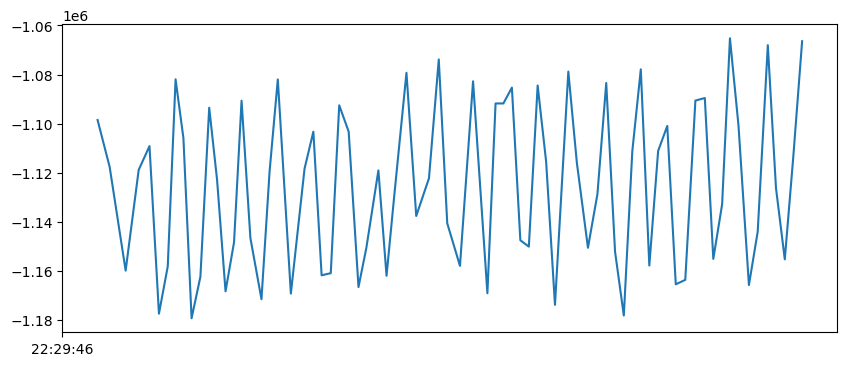

In [82]:
plt.figure(figsize=(10,4))
plt.plot(x,y)
plt.show()

In [84]:
with open('c:\\Users\\opticslab\\Documents\\Realm Project\\Realms Bochoa\\Piezoelectric Characterization\\Data\\10Hz_5V_Sin_Epics.txt', 'w') as f:
    f.write(data.to_string(index=True)) 